**Handwritten digits classification **

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves  when you use convolutional neural network.



In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape


(10000, 28, 28)

In [ ]:
X_train[0].shape

(28, 28)

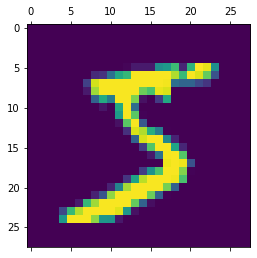

In [ ]:
plt.matshow(X_train[0])

In [ ]:
y_train[0]

5

In [ ]:
X_train = X_train / 255
X_test = X_test / 255

Using ANN for **classification**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2760 - accuracy: 0.9208
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1274 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916 - accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0707 - accuracy: 0.9783
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0555 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0452 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0369 - accuracy: 0.9887
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0306 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0258 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.021

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0790 - accuracy: 0.9786


[0.07901665568351746, 0.978600025177002]

In [ ]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape

(60000, 28, 28, 1)

In [ ]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape

(10000, 28, 28, 1)

Using CNN for **classification**

In [ ]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 38s 20ms/step - loss: 0.1553 - accuracy: 0.9540
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0538 - accuracy: 0.9834
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0354 - accuracy: 0.9890
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0234 - accuracy: 0.9927
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0159 - accuracy: 0.9948


In [ ]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.0438 - accuracy: 0.9868


[0.04381062462925911, 0.9868000149726868]